In [262]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [263]:
train = pd.read_csv("train.csv")
train_3 = train.copy()
train_3.info()
prices = train_3.SalePrice

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [264]:
sns.set(rc={'figure.figsize':(5, 3)})
def process_categorical_feature(df, feature_name, mapping):
    feature = train_3[[feature_name, "SalePrice"]]
    feature.fillna("NA", inplace=True)
    print("Unique values of "+feature_name)
    unique = feature[feature_name].unique()
    print(feature[feature_name].value_counts())
    plt.figure(100)
    if mapping is None:
        sorted_uniques = feature.groupby(feature_name).mean().reset_index().sort_values('SalePrice')
        mapping =  {i:0 for i in sorted_uniques[feature_name]}
    ax = sns.violinplot(data=[feature[feature[feature_name] == level]["SalePrice"].values
                   for level in mapping.keys() if level in unique], cut=0, inner='box')
    ax.set_title('House '+feature_name)
    ax.yaxis.grid(True)
    ax.set_xlabel(feature_name+'  Level')
    ax.set_ylabel('House Price')
    xlabels = [s for s in mapping.keys() if s in unique]
    ax.set_xticklabels(xlabels, rotation=90 if len(xlabels)>7 else 0)

def process_numeric_feature(feature_name):
    feature = train_3[[feature_name, "SalePrice"]]
    print(feature.info())
    feature.fillna(0, inplace=True)
    feature_temp = feature.set_index(feature[feature_name]).drop(feature_name, axis=1)
    feature_temp.sort_index(inplace=True)
    plt.figure(0)
    feature_temp.rolling(30).mean().plot(grid='true', c='r')
    plt.scatter(x=feature[feature_name], y=feature.SalePrice, s=1)
    plt.xlabel(feature_name)
    plt.ylabel("SalePrice")
    plt.show()

    plt.figure(1)
    sns.regplot(feature[feature_name], feature.SalePrice, ci=None)

    plt.figure(2)
    sns.ecdfplot(data=feature[feature_name],)

##**MSSubClass**

Unique values of MSSubClass
20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64


D:\Anaconda\lib\site-packages\pandas\core\frame.py:4462: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


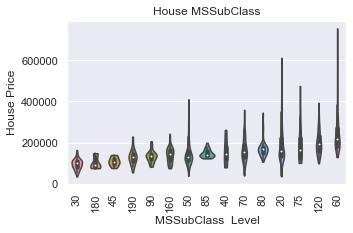

In [265]:
process_categorical_feature(train_3, "MSSubClass", None)

##**MSZoning: Identifies the general zoning classification of the sale.**

D:\Anaconda\lib\site-packages\pandas\core\frame.py:4462: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


Unique values of MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64


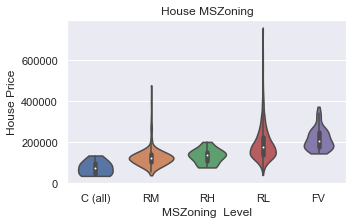

In [266]:
process_categorical_feature(train_3, "MSZoning", None)

##**LotFrontage: Linear feet of street connected to property**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   LotFrontage  1201 non-null   float64
 1   SalePrice    1460 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 22.9 KB
None


<Figure size 360x216 with 0 Axes>

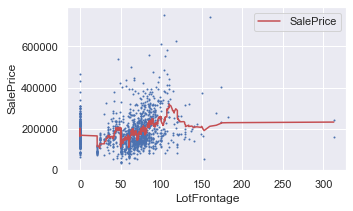

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


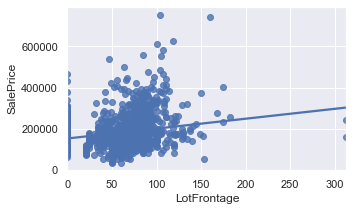

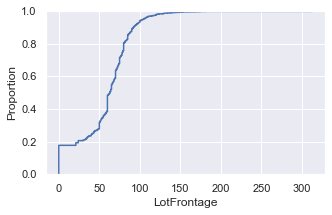

In [267]:
process_numeric_feature("LotFrontage")

##**LotArea: Lot size in square feet**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   LotFrontage  1201 non-null   float64
 1   SalePrice    1460 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 22.9 KB
None


D:\Anaconda\lib\site-packages\pandas\core\frame.py:4462: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


<Figure size 360x216 with 0 Axes>

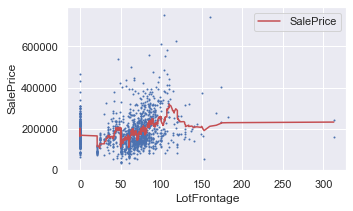

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


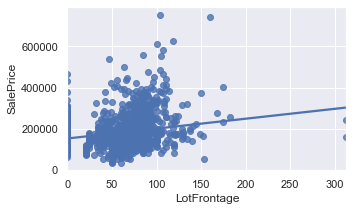

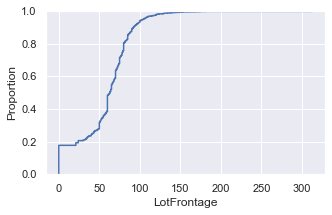

In [268]:
process_numeric_feature("LotFrontage")

##**Street: Type of road access to property**

D:\Anaconda\lib\site-packages\pandas\core\frame.py:4462: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


Unique values of Street
Pave    1454
Grvl       6
Name: Street, dtype: int64


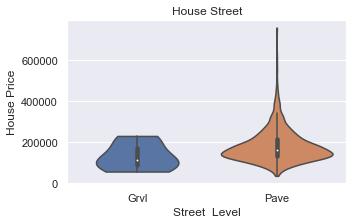

In [269]:
process_categorical_feature(train_3, "Street", None)

##**Alley: Type of alley access to property**

Unique values of Alley
NA      1369
Grvl      50
Pave      41
Name: Alley, dtype: int64


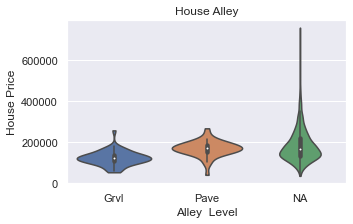

In [270]:
process_categorical_feature(train_3, "Alley", None)

##**LotShape: General shape of property**

Unique values of LotShape
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64


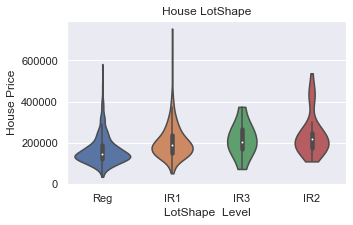

In [271]:
process_categorical_feature(train_3, "LotShape", None)

##**LandContour: Flatness of the property**

Unique values of LandContour
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64


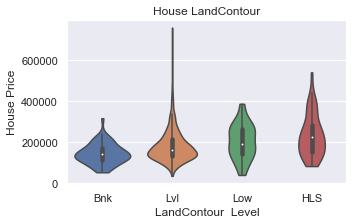

In [272]:
process_categorical_feature(train_3, "LandContour", None)

##**Utilities: Type of utilities available**

Unique values of Utilities
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64


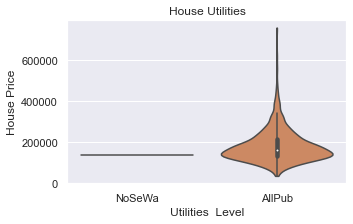

In [273]:
process_categorical_feature(train_3, "Utilities", None)

##**LotConfig: Lot configuration**

Unique values of LotConfig
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64


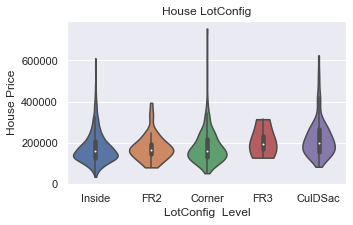

In [274]:
process_categorical_feature(train_3, "LotConfig", None)

##**LandSlope: Slope of property**

Unique values of LandSlope
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64


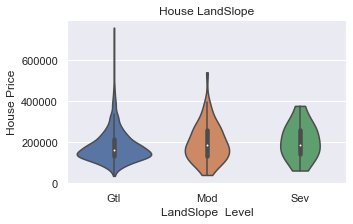

In [275]:
process_categorical_feature(train_3, "LandSlope", None)

##**Neighborhood: Physical locations within Ames city limits**

Unique values of Neighborhood
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64


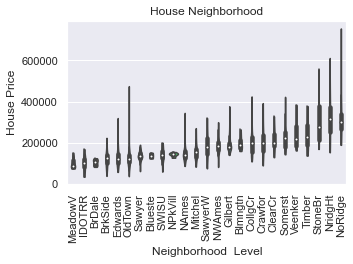

In [276]:
process_categorical_feature(train_3, "Neighborhood", None)

##**Condition1: Proximity to various conditions**

Unique values of Condition1
Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64


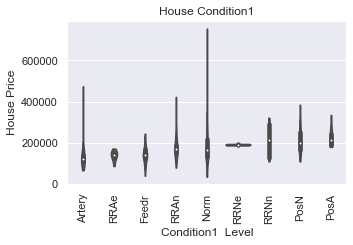

In [277]:
process_categorical_feature(train_3, "Condition1", None)

##**Condition2: Proximity to various conditions (if more than one is present)**

Unique values of Condition2
Norm      1445
Feedr        6
PosN         2
RRNn         2
Artery       2
PosA         1
RRAe         1
RRAn         1
Name: Condition2, dtype: int64


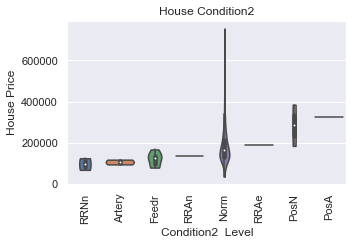

In [278]:
process_categorical_feature(train_3, "Condition2", None)

##**BldgType: Type of dwelling**

Unique values of BldgType
1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64


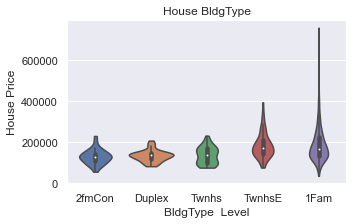

In [279]:
process_categorical_feature(train_3, "BldgType", None)

##**HouseStyle: Style of dwelling**

Unique values of HouseStyle
1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64


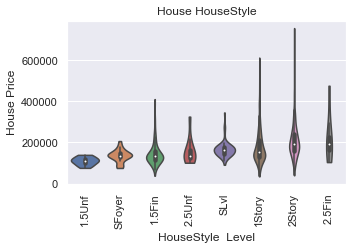

In [280]:
process_categorical_feature(train_3, "HouseStyle", None)

##**OverallQual: Rates the overall material and finish of the house**

Unique values of OverallQual
5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64


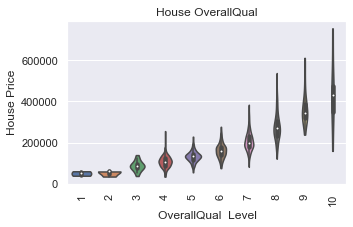

In [281]:
process_categorical_feature(train_3, "OverallQual", None)

##**OverallCond: Rates the overall condition of the house**

D:\Anaconda\lib\site-packages\pandas\core\frame.py:4462: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


Unique values of OverallCond
5    821
6    252
7    205
8     72
4     57
3     25
9     22
2      5
1      1
Name: OverallCond, dtype: int64


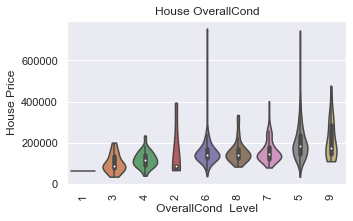

In [282]:
process_categorical_feature(train_3, "OverallCond", None)

##**YearBuilt: Original construction date**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   YearBuilt  1460 non-null   int64
 1   SalePrice  1460 non-null   int64
dtypes: int64(2)
memory usage: 22.9 KB
None


D:\Anaconda\lib\site-packages\pandas\core\frame.py:4462: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


<Figure size 360x216 with 0 Axes>

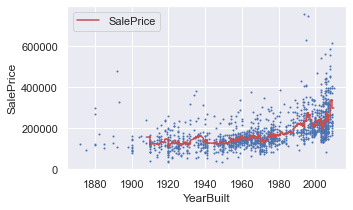

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


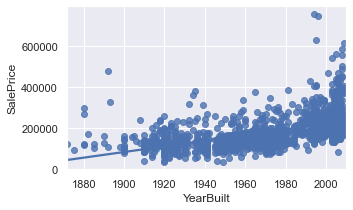

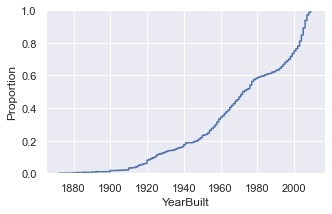

In [283]:
process_numeric_feature("YearBuilt")

##**YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   YearRemodAdd  1460 non-null   int64
 1   SalePrice     1460 non-null   int64
dtypes: int64(2)
memory usage: 22.9 KB
None


D:\Anaconda\lib\site-packages\pandas\core\frame.py:4462: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


<Figure size 360x216 with 0 Axes>

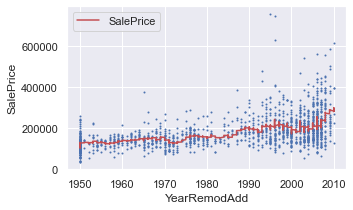

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


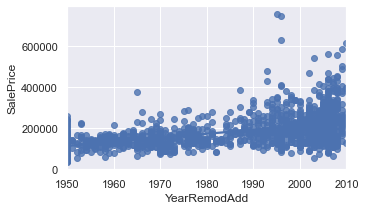

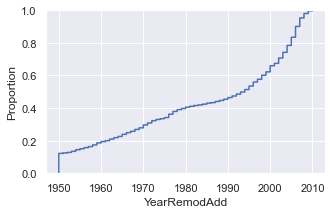

In [284]:
process_numeric_feature("YearRemodAdd")

##**RoofStyle: Type of roof**

D:\Anaconda\lib\site-packages\pandas\core\frame.py:4462: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


Unique values of RoofStyle
Gable      1141
Hip         286
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: RoofStyle, dtype: int64


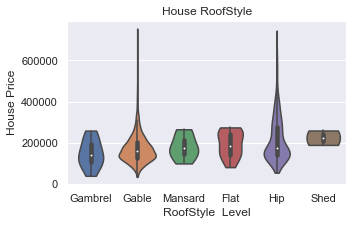

In [285]:
process_categorical_feature(train_3, "RoofStyle", None)

##**RoofMatl: Roof material**

Unique values of RoofMatl
CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
Membran       1
Roll          1
ClyTile       1
Metal         1
Name: RoofMatl, dtype: int64


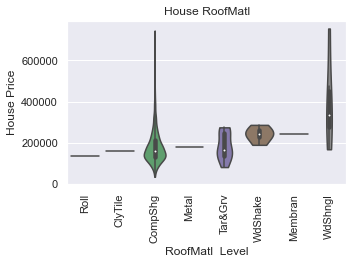

In [286]:
process_categorical_feature(train_3, "RoofMatl", None)

##**Exterior1st: Exterior covering on house**

Unique values of Exterior1st
VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
Stone        2
BrkComm      2
CBlock       1
AsphShn      1
ImStucc      1
Name: Exterior1st, dtype: int64


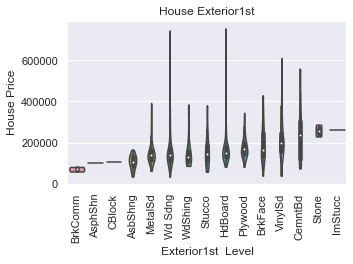

In [287]:
process_categorical_feature(train_3, "Exterior1st", None)

##**Exterior2nd: Exterior covering on house (if more than one material)**

Unique values of Exterior2nd
VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
Other        1
CBlock       1
Name: Exterior2nd, dtype: int64


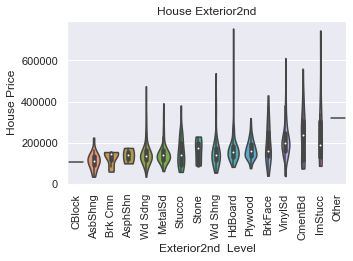

In [288]:
process_categorical_feature(train_3, "Exterior2nd", None)

##**MasVnrType: Masonry veneer type**

Unique values of MasVnrType
None       864
BrkFace    445
Stone      128
BrkCmn      15
NA           8
Name: MasVnrType, dtype: int64


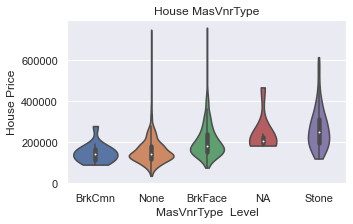

In [289]:
process_categorical_feature(train_3, "MasVnrType", None)

##**MasVnrArea: Masonry veneer area in square feet**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MasVnrArea  1452 non-null   float64
 1   SalePrice   1460 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 22.9 KB
None


<Figure size 360x216 with 0 Axes>

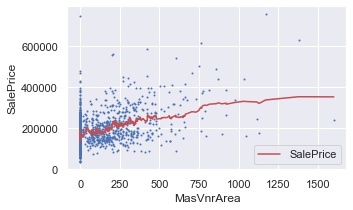

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


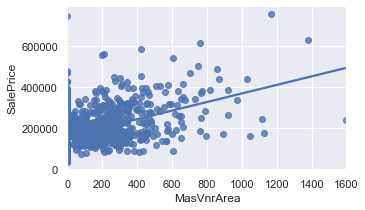

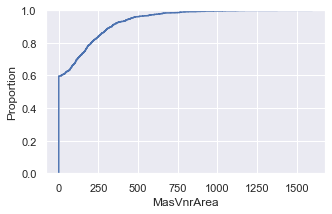

In [290]:
process_numeric_feature("MasVnrArea")

##**ExterQual: Evaluates the quality of the material on the exterior**

D:\Anaconda\lib\site-packages\pandas\core\frame.py:4462: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


Unique values of ExterQual
TA    906
Gd    488
Ex     52
Fa     14
Name: ExterQual, dtype: int64


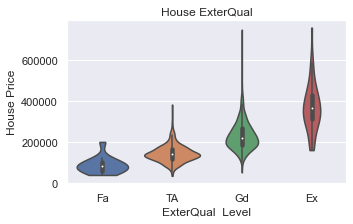

In [291]:
process_categorical_feature(train_3, "ExterQual", None)

##**ExterCond: Evaluates the present condition of the material on the exterior**

Unique values of ExterCond
TA    1282
Gd     146
Fa      28
Ex       3
Po       1
Name: ExterCond, dtype: int64


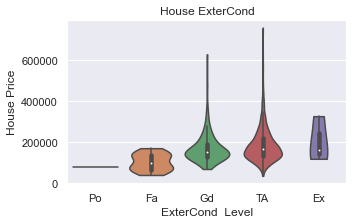

In [292]:
process_categorical_feature(train_3, "ExterCond", None)

##**Foundation: Type of foundation**

Unique values of Foundation
PConc     647
CBlock    634
BrkTil    146
Slab       24
Stone       6
Wood        3
Name: Foundation, dtype: int64


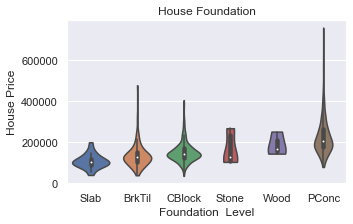

In [293]:
process_categorical_feature(train_3, "Foundation", None)

##**BsmtQual: Evaluates the height of the basement**

Unique values of BsmtQual
TA    649
Gd    618
Ex    121
NA     37
Fa     35
Name: BsmtQual, dtype: int64


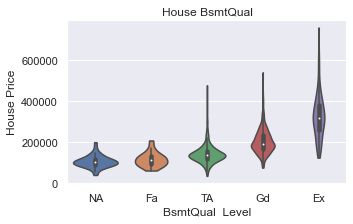

In [294]:
process_categorical_feature(train_3, "BsmtQual", None)

##**BsmtCond: Evaluates the general condition of the basement**

Unique values of BsmtCond
TA    1311
Gd      65
Fa      45
NA      37
Po       2
Name: BsmtCond, dtype: int64


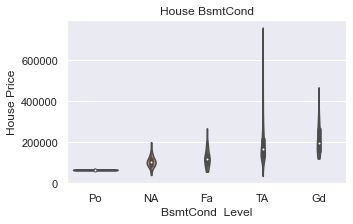

In [295]:
process_categorical_feature(train_3, "BsmtCond", None)

##**BsmtExposure: Refers to walkout or garden level walls**

Unique values of BsmtExposure
No    953
Av    221
Gd    134
Mn    114
NA     38
Name: BsmtExposure, dtype: int64


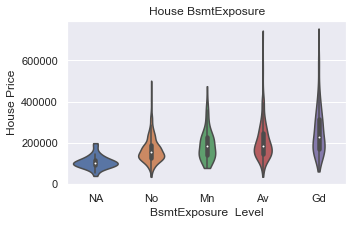

In [296]:
process_categorical_feature(train_3, "BsmtExposure", None)

##**BsmtFinType1: Rating of basement finished area**

Unique values of BsmtFinType1
Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
NA      37
Name: BsmtFinType1, dtype: int64


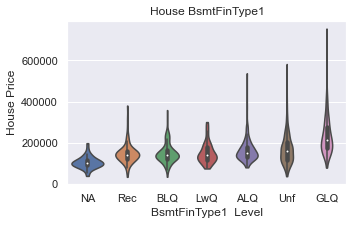

In [297]:
process_categorical_feature(train_3, "BsmtFinType1", None)

##**BsmtFinSF1: Type 1 finished square feet**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   BsmtFinSF1  1460 non-null   int64
 1   SalePrice   1460 non-null   int64
dtypes: int64(2)
memory usage: 22.9 KB
None


<Figure size 360x216 with 0 Axes>

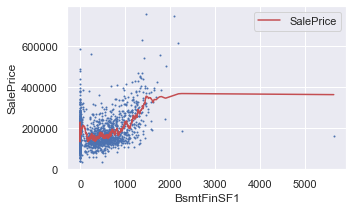

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


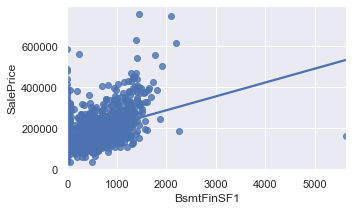

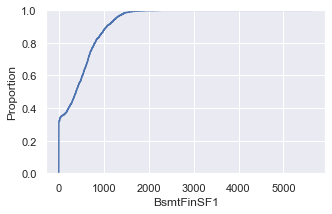

In [298]:
process_numeric_feature("BsmtFinSF1")

##**BsmtFinType2: Rating of basement finished area (if multiple types)**

D:\Anaconda\lib\site-packages\pandas\core\frame.py:4462: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


Unique values of BsmtFinType2
Unf    1256
Rec      54
LwQ      46
NA       38
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64


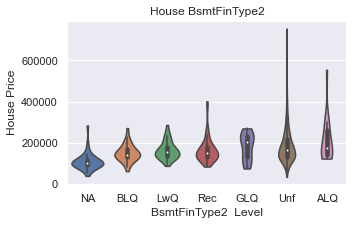

In [299]:
process_categorical_feature(train_3, "BsmtFinType2", None)

##**BsmtFinSF2: Type 2 finished square feet**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   BsmtFinSF2  1460 non-null   int64
 1   SalePrice   1460 non-null   int64
dtypes: int64(2)
memory usage: 22.9 KB
None


<Figure size 360x216 with 0 Axes>

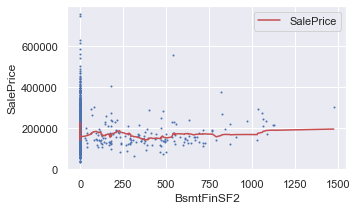

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


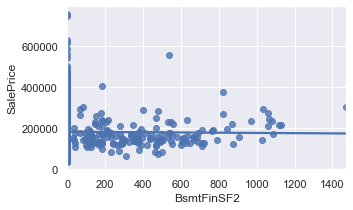

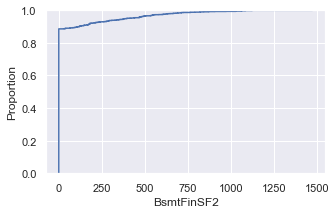

In [300]:
process_numeric_feature("BsmtFinSF2")

##**BsmtUnfSF: Unfinished square feet of basement area**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   BsmtUnfSF  1460 non-null   int64
 1   SalePrice  1460 non-null   int64
dtypes: int64(2)
memory usage: 22.9 KB
None


D:\Anaconda\lib\site-packages\pandas\core\frame.py:4462: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


<Figure size 360x216 with 0 Axes>

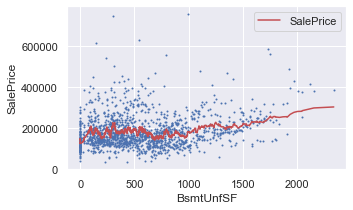

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


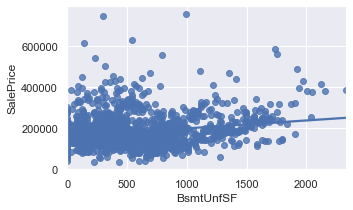

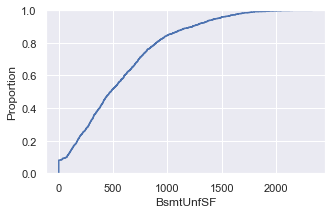

In [301]:
process_numeric_feature("BsmtUnfSF")

##**TotalBsmtSF: Total square feet of basement area**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   TotalBsmtSF  1460 non-null   int64
 1   SalePrice    1460 non-null   int64
dtypes: int64(2)
memory usage: 22.9 KB
None


D:\Anaconda\lib\site-packages\pandas\core\frame.py:4462: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


<Figure size 360x216 with 0 Axes>

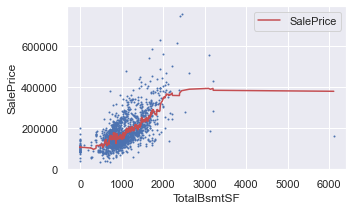

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


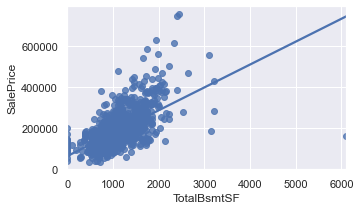

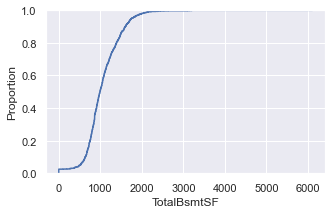

In [302]:
process_numeric_feature("TotalBsmtSF")

##**Heating: Type of heating**

D:\Anaconda\lib\site-packages\pandas\core\frame.py:4462: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


Unique values of Heating
GasA     1428
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: Heating, dtype: int64


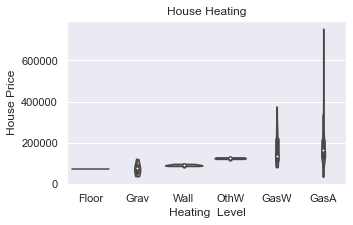

In [303]:
process_categorical_feature(train_3, "Heating", None)

##**HeatingQC: Heating quality and condition**

Unique values of HeatingQC
Ex    741
TA    428
Gd    241
Fa     49
Po      1
Name: HeatingQC, dtype: int64


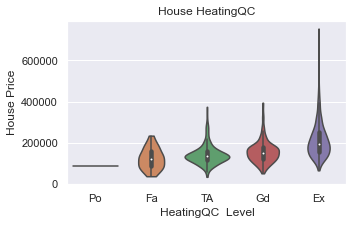

In [304]:
process_categorical_feature(train_3, "HeatingQC", None)

##**CentralAir: Central air conditioning**

Unique values of CentralAir
Y    1365
N      95
Name: CentralAir, dtype: int64


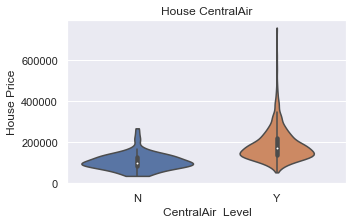

In [305]:
process_categorical_feature(train_3, "CentralAir", None)

##**Electrical: Electrical system**

Unique values of Electrical
SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
NA          1
Name: Electrical, dtype: int64


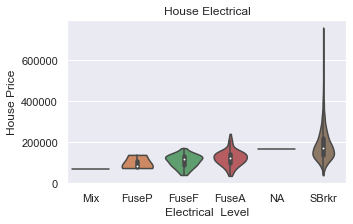

In [306]:
process_categorical_feature(train_3, "Electrical", None)

##**1stFlrSF: First Floor square feet**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   1stFlrSF   1460 non-null   int64
 1   SalePrice  1460 non-null   int64
dtypes: int64(2)
memory usage: 22.9 KB
None


<Figure size 360x216 with 0 Axes>

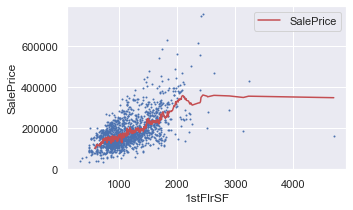

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


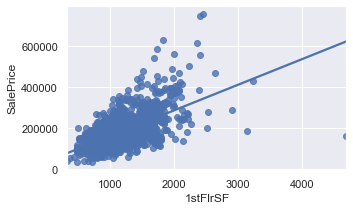

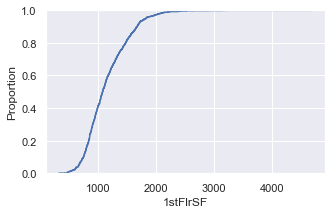

In [307]:
process_numeric_feature("1stFlrSF")

##**2ndFlrSF: Second floor square feet**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   2ndFlrSF   1460 non-null   int64
 1   SalePrice  1460 non-null   int64
dtypes: int64(2)
memory usage: 22.9 KB
None


D:\Anaconda\lib\site-packages\pandas\core\frame.py:4462: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


<Figure size 360x216 with 0 Axes>

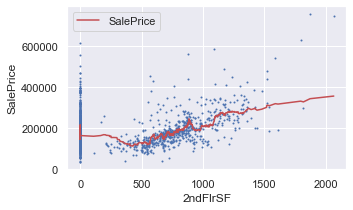

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


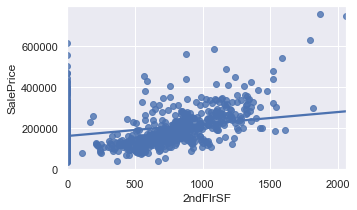

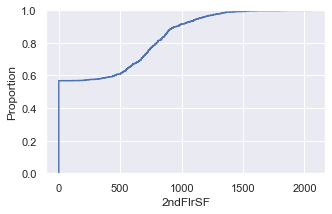

In [308]:
process_numeric_feature("2ndFlrSF")

##**LowQualFinSF: Low quality finished square feet (all floors)**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   LowQualFinSF  1460 non-null   int64
 1   SalePrice     1460 non-null   int64
dtypes: int64(2)
memory usage: 22.9 KB
None


D:\Anaconda\lib\site-packages\pandas\core\frame.py:4462: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


<Figure size 360x216 with 0 Axes>

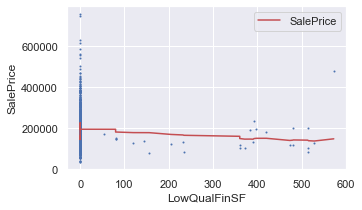

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


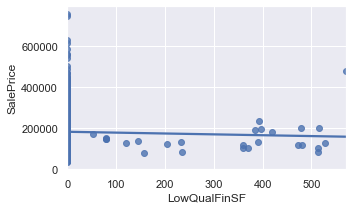

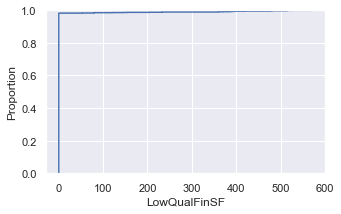

In [309]:
process_numeric_feature("LowQualFinSF")

##**GrLivArea: Above grade (ground) living area square feet**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   GrLivArea  1460 non-null   int64
 1   SalePrice  1460 non-null   int64
dtypes: int64(2)
memory usage: 22.9 KB
None


D:\Anaconda\lib\site-packages\pandas\core\frame.py:4462: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


<Figure size 360x216 with 0 Axes>

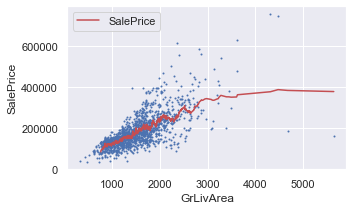

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


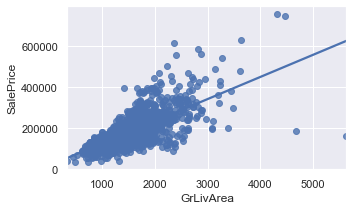

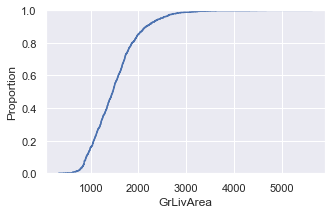

In [310]:
process_numeric_feature("GrLivArea")

##**BsmtFullBath: Basement full bathrooms**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   BsmtFullBath  1460 non-null   int64
 1   SalePrice     1460 non-null   int64
dtypes: int64(2)
memory usage: 22.9 KB
None


D:\Anaconda\lib\site-packages\pandas\core\frame.py:4462: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


<Figure size 360x216 with 0 Axes>

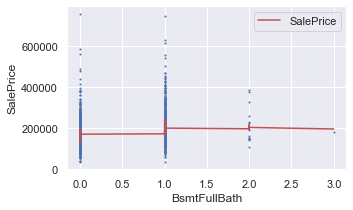

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


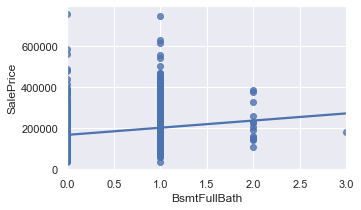

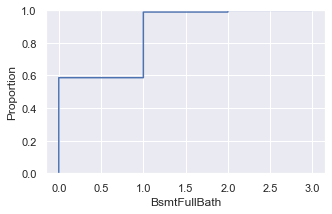

In [311]:
process_numeric_feature("BsmtFullBath")

##**BsmtHalfBath: Basement half bathrooms**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   BsmtHalfBath  1460 non-null   int64
 1   SalePrice     1460 non-null   int64
dtypes: int64(2)
memory usage: 22.9 KB
None


D:\Anaconda\lib\site-packages\pandas\core\frame.py:4462: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


<Figure size 360x216 with 0 Axes>

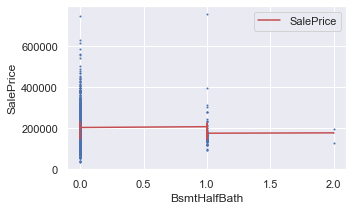

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


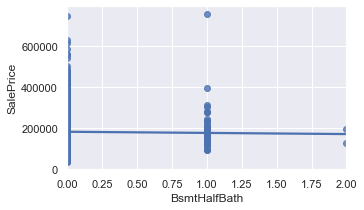

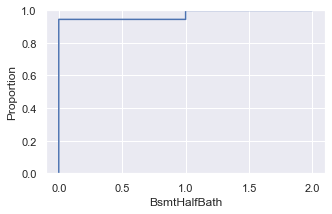

In [312]:
process_numeric_feature("BsmtHalfBath")

##**FullBath: Full bathrooms above grade**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   FullBath   1460 non-null   int64
 1   SalePrice  1460 non-null   int64
dtypes: int64(2)
memory usage: 22.9 KB
None


D:\Anaconda\lib\site-packages\pandas\core\frame.py:4462: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


<Figure size 360x216 with 0 Axes>

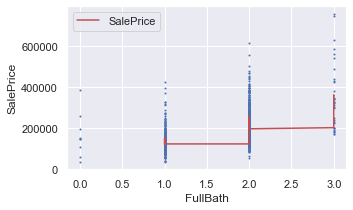

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


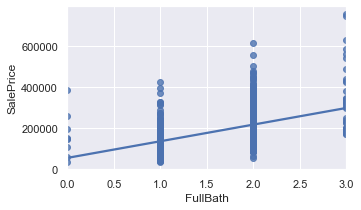

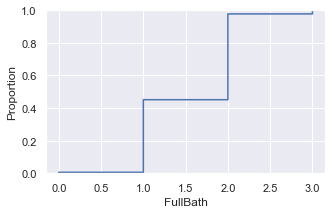

In [313]:
process_numeric_feature("FullBath")

##**HalfBath: Half baths above grade**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   HalfBath   1460 non-null   int64
 1   SalePrice  1460 non-null   int64
dtypes: int64(2)
memory usage: 22.9 KB
None


D:\Anaconda\lib\site-packages\pandas\core\frame.py:4462: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


<Figure size 360x216 with 0 Axes>

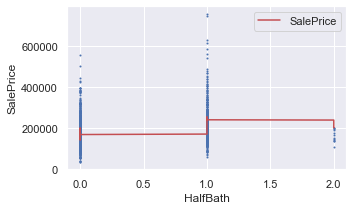

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Anaconda\lib\site-packages\pandas\core\frame.py:4462: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


Unique values of HalfBath
0    913
1    535
2     12
Name: HalfBath, dtype: int64


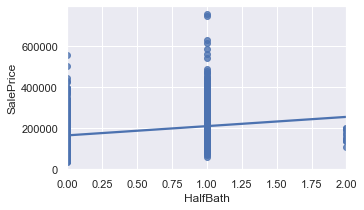

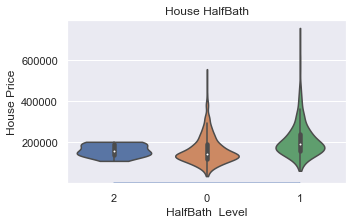

In [344]:
process_numeric_feature("HalfBath")
process_categorical_feature(train_3, "HalfBath", None)

##**BedroomAbvGr: Bedrooms above grade (does NOT include basement bedrooms)**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   BedroomAbvGr  1460 non-null   int64
 1   SalePrice     1460 non-null   int64
dtypes: int64(2)
memory usage: 22.9 KB
None


D:\Anaconda\lib\site-packages\pandas\core\frame.py:4462: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


<Figure size 360x216 with 0 Axes>

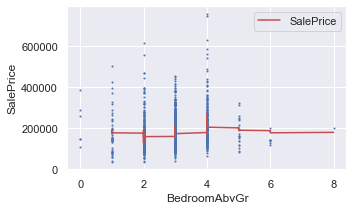

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


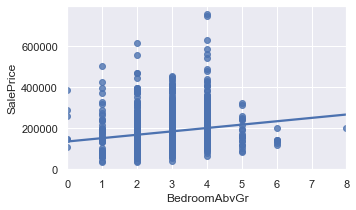

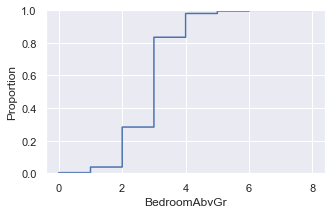

In [316]:
process_numeric_feature("BedroomAbvGr")

##**KitchenAbvGr: Kitchens above grade**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   KitchenAbvGr  1460 non-null   int64
 1   SalePrice     1460 non-null   int64
dtypes: int64(2)
memory usage: 22.9 KB
None


D:\Anaconda\lib\site-packages\pandas\core\frame.py:4462: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


<Figure size 360x216 with 0 Axes>

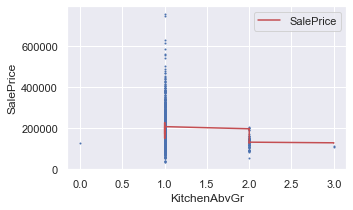

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


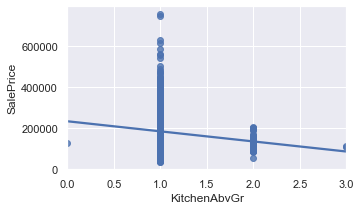

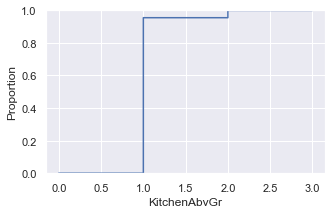

In [317]:
process_numeric_feature("KitchenAbvGr")

##**KitchenQual: Kitchen quality**

D:\Anaconda\lib\site-packages\pandas\core\frame.py:4462: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


Unique values of KitchenQual
TA    735
Gd    586
Ex    100
Fa     39
Name: KitchenQual, dtype: int64


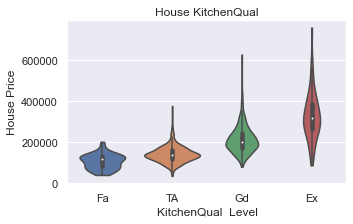

In [318]:
process_categorical_feature(train_3, "KitchenQual", None)

##**TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   TotRmsAbvGrd  1460 non-null   int64
 1   SalePrice     1460 non-null   int64
dtypes: int64(2)
memory usage: 22.9 KB
None


<Figure size 360x216 with 0 Axes>

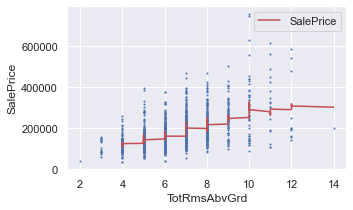

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


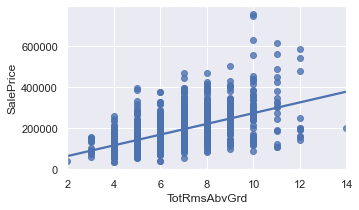

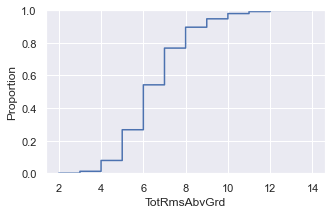

In [319]:
process_numeric_feature("TotRmsAbvGrd")

##**Functional: Home functionality (Ruled out)**
Nearly all (i.e., 93.15%) have 'Typ' as Functional value. Also, through a violin plot, we see that
the correlations between Function and SalePrice are not significant.

D:\Anaconda\lib\site-packages\pandas\core\frame.py:4462: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


Unique values of Functional
Typ     1360
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: Functional, dtype: int64


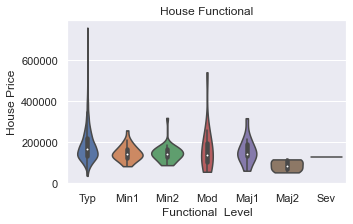

In [320]:
mapping_Functional = {'Typ': 0, 'Min1': 1, 'Min2': 2, 'Mod': 3, 'Maj1': 4,
                      'Maj2': 5, 'Sev': 6, 'Sal':7}
process_categorical_feature(train_3, "Functional", mapping_Functional)

##**Fireplaces: Number of fireplaces**
Clearly higher fireplaces number leads to higher price. While there are only 5 entries with 3 fireplaces
AND the mean and deviation of price distribution are similar where there are 2 or 3 fireplaces. Thus,
we will combine Fireplaces==3 into Fireplaces==2.

Unique values of Fireplaces
0    690
1    650
2    115
3      5
Name: Fireplaces, dtype: int64


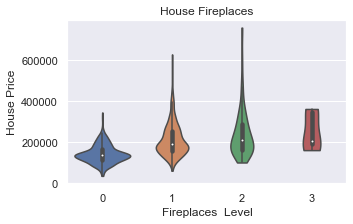

In [321]:
process_categorical_feature(train_3, "Fireplaces", {0:0, 1:1, 2:2,3:3})

##**Fireplaces: Number of fireplaces**
Clearly higher fireplace quality leads to higher price. NA and po, TA and GD may be combined.

D:\Anaconda\lib\site-packages\pandas\core\frame.py:4462: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


Unique values of FireplaceQu
NA    690
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64


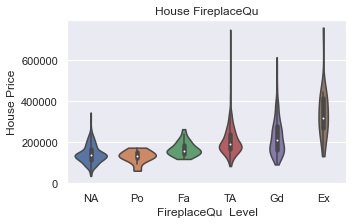

In [322]:
mapping_FireplaceQu = {'NA': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4,
                      'Ex': 5}
process_categorical_feature(train_3, "FireplaceQu", mapping_FireplaceQu)

#**Garage Series**
Features with unknown data are abandoned.
PCA will be applied on the remaining useful features.
##**GarageType: Garage location**
No NA value is in training data
There is an increasing trend of GarageTypes and SalePrice. Combination is required.

Unique values of GarageType
Attchd     870
Detchd     387
BuiltIn     88
NA          81
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64


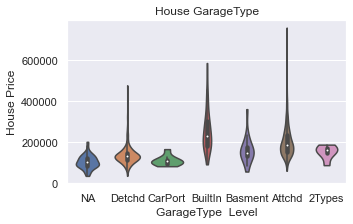

In [323]:
mapping_GarageType = {'NA': 0, 'Detchd': 1, 'CarPort': 2, 'BuiltIn': 3, 'Basment': 4,
                      'Attchd': 5, '2Types':6}
process_categorical_feature(train_3, "GarageType", mapping_GarageType)

Unique values of GarageType
Attchd     870
Detchd     387
BuiltIn     88
NA          81
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64


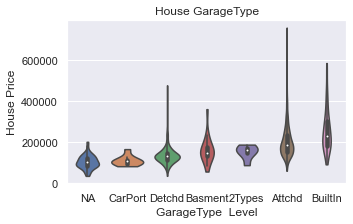

In [324]:
mapping_GarageType_revised = {'NA': 0, 'CarPort': 1, 'Detchd': 2, 'Basment': 3, '2Types': 4,
                      'Attchd': 5, 'BuiltIn':6}
process_categorical_feature(train_3, "GarageType", mapping_GarageType_revised)

##**GarageCars: Size of garage in car capacity**
0 1, 2 4 can be combined.

2    824
1    369
3    181
0     81
4      5
Name: GarageCars, dtype: int64
Unique values of GarageCars
2    824
1    369
3    181
0     81
4      5
Name: GarageCars, dtype: int64


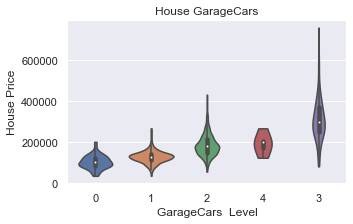

In [325]:
print(train_3["GarageCars"].value_counts())
mapping_GarageCars = {0:0,1:1,2:2,4:3,3:4}
process_categorical_feature(train_3, "GarageCars", mapping_GarageCars)

##**GarageArea:Size of garage in square feet**
OUTLIERS

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   GarageArea  1460 non-null   int64
 1   SalePrice   1460 non-null   int64
dtypes: int64(2)
memory usage: 22.9 KB
None


D:\Anaconda\lib\site-packages\pandas\core\frame.py:4462: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


<Figure size 360x216 with 0 Axes>

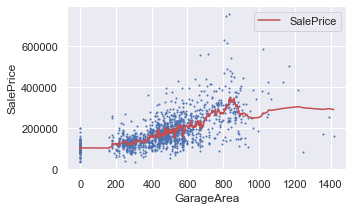

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


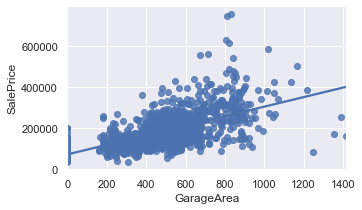

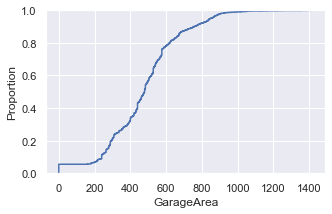

In [326]:
process_numeric_feature("GarageArea")

##**GarageQual: Garage quality**
89.7% of this feature is TA. It may not be useful.

D:\Anaconda\lib\site-packages\pandas\core\frame.py:4462: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


Unique values of GarageQual
TA    1311
NA      81
Fa      48
Gd      14
Po       3
Ex       3
Name: GarageQual, dtype: int64


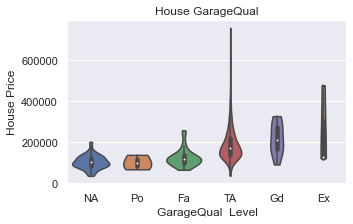

In [327]:
mapping_GarageQual = {'NA': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4,
                      'Ex': 5}
process_categorical_feature(train_3, "GarageQual", mapping_GarageQual)

##**GarageCond: Garage condition**
90.8% of this feature is TA. It may not be useful.

Unique values of GarageCond
TA    1326
NA      81
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64


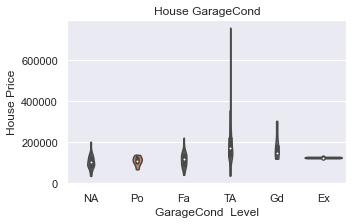

In [328]:
mapping_GarageCond = {'NA': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4,
                      'Ex': 5}
process_categorical_feature(train_3, "GarageCond", mapping_GarageCond)

##**PavedDrive: Paved driveway**
90.8% of this feature is TA. It may not be useful.

Unique values of PavedDrive
Y    1340
N      90
P      30
Name: PavedDrive, dtype: int64


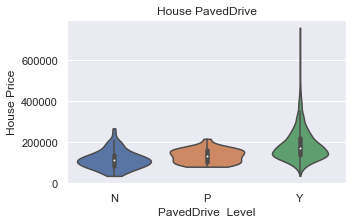

In [329]:
mapping_PavedDrive = {'N': 0, 'P': 1, 'Y': 2}
process_categorical_feature(train_3, "PavedDrive", mapping_PavedDrive)

##**WoodDeckSF: Wood deck area in square feet**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   WoodDeckSF  1460 non-null   int64
 1   SalePrice   1460 non-null   int64
dtypes: int64(2)
memory usage: 22.9 KB
None


<Figure size 360x216 with 0 Axes>

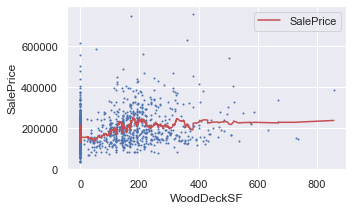

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


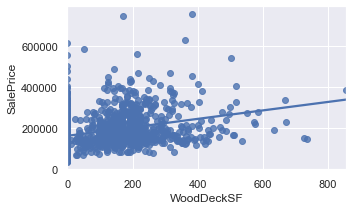

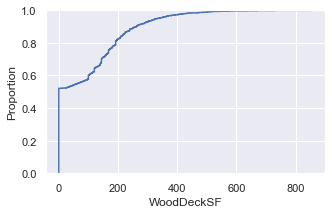

In [330]:
process_numeric_feature("WoodDeckSF")

#Porch Series
##**OpenPorchSF: Open porch area in square feet**
Too many zero values (near a half).
Regression line shows the existence of correlation.
Mean values shows limited differences

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   OpenPorchSF  1460 non-null   int64
 1   SalePrice    1460 non-null   int64
dtypes: int64(2)
memory usage: 22.9 KB
None


D:\Anaconda\lib\site-packages\pandas\core\frame.py:4462: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


<Figure size 360x216 with 0 Axes>

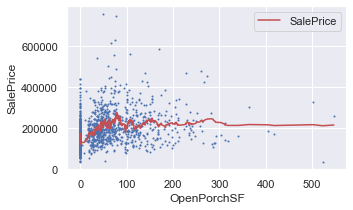

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


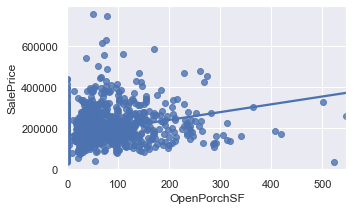

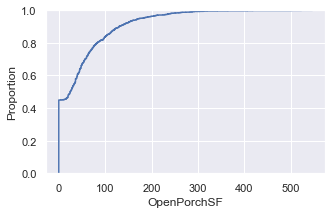

In [331]:
process_numeric_feature("OpenPorchSF")

##**EnclosedPorch: Enclosed porch area in square feet**
Too many zero values (nearly 90%).
Regression line shows the existence of correlation.
Mean values shows limited differences

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   EnclosedPorch  1460 non-null   int64
 1   SalePrice      1460 non-null   int64
dtypes: int64(2)
memory usage: 22.9 KB
None


D:\Anaconda\lib\site-packages\pandas\core\frame.py:4462: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


<Figure size 360x216 with 0 Axes>

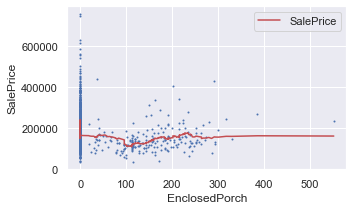

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


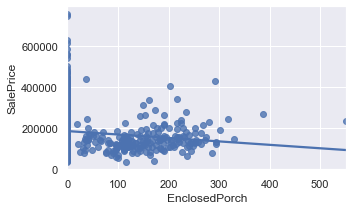

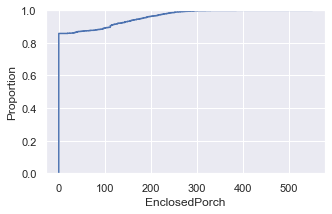

In [332]:
process_numeric_feature("EnclosedPorch")

##**3SsnPorch: Three season porch area in square feet**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   3SsnPorch  1460 non-null   int64
 1   SalePrice  1460 non-null   int64
dtypes: int64(2)
memory usage: 22.9 KB
None


D:\Anaconda\lib\site-packages\pandas\core\frame.py:4462: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


<Figure size 360x216 with 0 Axes>

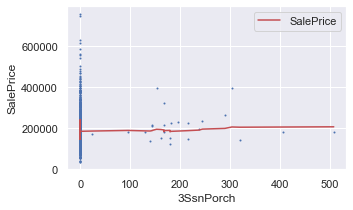

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


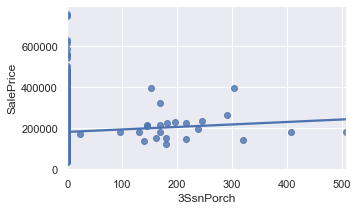

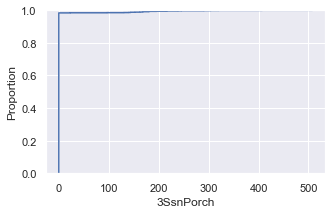

In [333]:
process_numeric_feature("3SsnPorch")

##**ScreenPorch: Three season porch area in square feet**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   ScreenPorch  1460 non-null   int64
 1   SalePrice    1460 non-null   int64
dtypes: int64(2)
memory usage: 22.9 KB
None


D:\Anaconda\lib\site-packages\pandas\core\frame.py:4462: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


<Figure size 360x216 with 0 Axes>

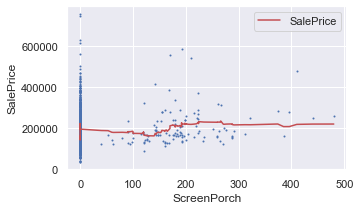

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


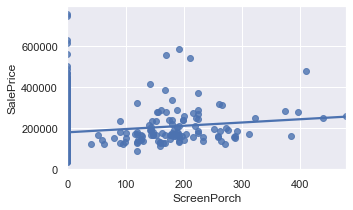

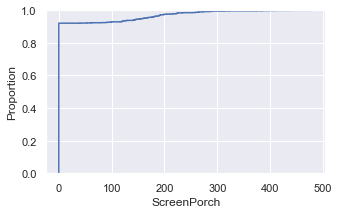

In [334]:
process_numeric_feature("ScreenPorch")

#Pool Series
##**PoolArea: Pool area in square feet**
No significance

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   PoolArea   1460 non-null   int64
 1   SalePrice  1460 non-null   int64
dtypes: int64(2)
memory usage: 22.9 KB
None


D:\Anaconda\lib\site-packages\pandas\core\frame.py:4462: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


<Figure size 360x216 with 0 Axes>

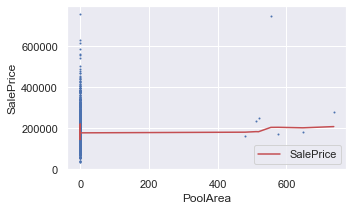

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


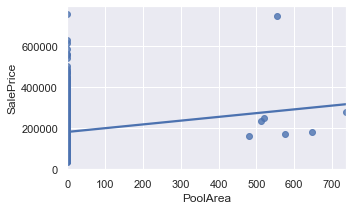

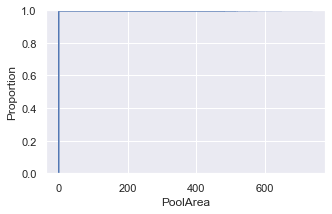

In [335]:
process_numeric_feature("PoolArea")

##**PoolQC: Pool quality**

D:\Anaconda\lib\site-packages\pandas\core\frame.py:4462: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


Unique values of PoolQC
NA    1453
Gd       3
Ex       2
Fa       2
Name: PoolQC, dtype: int64


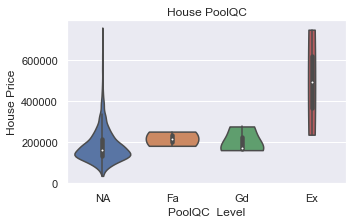

In [336]:
mapping_PoolQC = {'NA': 0, 'Fa': 1, 'TA': 2, 'Gd': 3,
                      'Ex': 4}
process_categorical_feature(train_3, "PoolQC", mapping_PoolQC )

##**Fence: Fence quality**
No fence has little difference from with-fence in saleprice.
Variation is still low.

Unique values of Fence
NA       1179
MnPrv     157
GdPrv      59
GdWo       54
MnWw       11
Name: Fence, dtype: int64


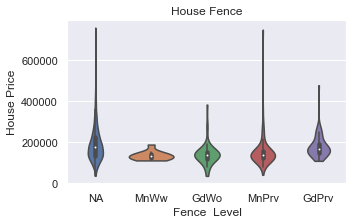

In [337]:
mapping_Fence = {'NA': 0, 'MnWw': 1, 'GdWo': 2, 'MnPrv': 3,
                      'GdPrv': 4}
train_3.Fence.fillna("NA", inplace=True)
process_categorical_feature(train_3, "Fence", mapping_Fence )

##**MiscFeature: Miscellaneous feature not covered in other categories**
##**MiscVal: $Value of miscellaneous feature**
Too special. Low variance.

Unique values of MiscFeature
NA      1406
Shed      49
Othr       2
Gar2       2
TenC       1
Name: MiscFeature, dtype: int64


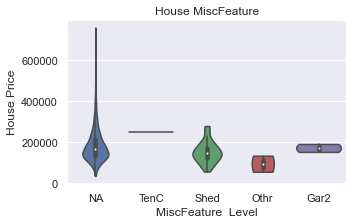

In [338]:
mapping_MiscFeature = {'NA': 0, 'TenC': 1, 'Shed': 2, 'Othr': 3,
                      'Gar2': 4, 'Elev': 5}
train_3.MiscFeature.fillna("NA", inplace=True)
process_categorical_feature(train_3, "MiscFeature", mapping_MiscFeature )

In [339]:
train_3[train_3.MiscFeature=='Gar2']

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
346,347,20,RL,NaN,12772,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NA,Gar2,15500,4,2007,WD,Normal,151500
1230,1231,90,RL,NaN,18890,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NA,Gar2,8300,8,2007,WD,Normal,190000


##**MoSold: Month Sold (MM)**
No correlation

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   MoSold     1460 non-null   int64
 1   SalePrice  1460 non-null   int64
dtypes: int64(2)
memory usage: 22.9 KB
None


D:\Anaconda\lib\site-packages\pandas\core\frame.py:4462: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


<Figure size 360x216 with 0 Axes>

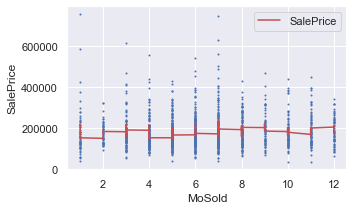

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


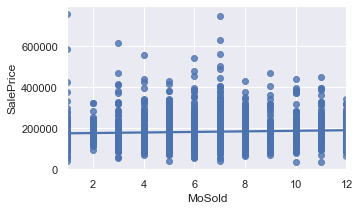

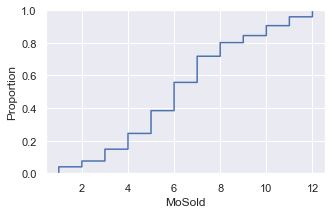

In [340]:
process_numeric_feature("MoSold")

##**YrSold: Year Sold (YYYY)**
No correlation

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   YrSold     1460 non-null   int64
 1   SalePrice  1460 non-null   int64
dtypes: int64(2)
memory usage: 22.9 KB
None


D:\Anaconda\lib\site-packages\pandas\core\frame.py:4462: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


<Figure size 360x216 with 0 Axes>

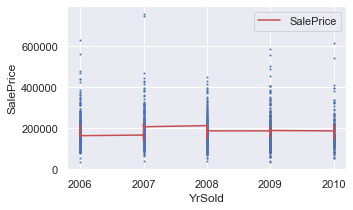

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Anaconda\lib\site-packages\pandas\core\frame.py:4462: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


Unique values of YrSold
2009    338
2007    329
2006    314
2008    304
2010    175
Name: YrSold, dtype: int64


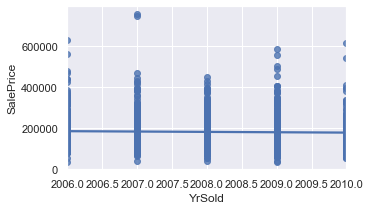

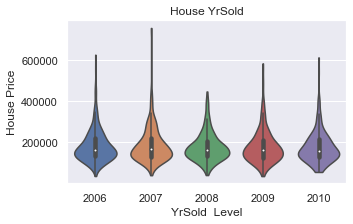

In [341]:
process_numeric_feature("YrSold")
process_categorical_feature(train_3, "YrSold", {2006:4, 2007:3, 2008:2, 2009:1, 2010:0})

## **SaleType**

D:\Anaconda\lib\site-packages\pandas\core\frame.py:4462: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


Unique values of SaleType
WD       1267
New       122
COD        43
ConLD       9
ConLw       5
ConLI       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64


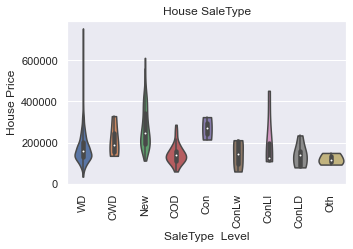

In [342]:
process_categorical_feature(train_3, "SaleType", {"WD": 0, "CWD": 1, "VWD": 2, "New":3,
                                                  "COD": 4, "Con": 5, "ConLw": 6, "ConLI": 7, "ConLD": 8, "Oth": 9})

## **SaleCondition**
Join Family and Alloca

Unique values of SaleCondition
Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64


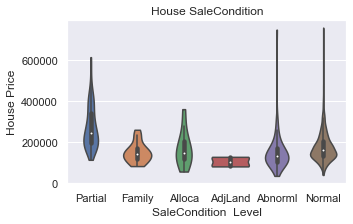

In [343]:
process_categorical_feature(train_3, "SaleCondition", {"Partial": 0, "Family": 1, "Alloca": 2, "AdjLand":3,
                                                  "Abnorml": 4, "Normal": 5})